In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sbn
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [3]:
dataFrame = pd.read_excel("maliciousornot.xlsx")

In [4]:
dataFrame

,Type,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,...,SOURCE_I,SOURCE_J,SOURCE_K,SOURCE_M,SOURCE_L,SOURCE_N,SOURCE_O,SOURCE_P,SOURCE_R,SOURCE_S
0,1,23.303047,13.445560,159.066933,1296.628667,0.153367,0.359585,0.388730,0.190544,0.313341,...,32.875560,22.448127,239.118533,2615.278000,0.210103,0.862174,0.922148,0.343781,0.595983,0.154015
1,1,26.645007,23.018073,172.149800,1717.612000,0.109767,0.101865,0.112564,0.090894,0.234714,...,32.370380,30.323753,205.698933,2533.672000,0.160362,0.241709,0.312953,240.932000,356.216667,0.115311
2,1,25.505113,27.525833,168.393333,1558.286000,0.141969,0.207124,0.255699,0.165673,0.268004,...,30.531007,33.069860,197.538333,2213.724667,0.187046,0.549869,0.583418,314.766000,0.468004,0.113445
3,1,14.792707,26.398893,100.491960,500.128200,0.184585,0.367745,0.312693,0.136269,0.336398,...,19.313420,34.326333,128.069607,735.360733,0.271761,1.122147,0.889764,0.333548,0.859842,224.092667
4,1,26.282313,18.575080,174.999533,1680.047333,0.129922,0.172020,256.476000,0.135103,0.234326,...,29.196813,21.593207,197.149733,2040.150000,0.177979,265.543333,0.518133,0.210492,0.306217,0.099456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
543,1,27.927387,29.002513,183.937333,1915.798000,143.782000,0.150129,0.315932,0.179922,0.223575,...,32.966233,34.196800,215.154867,2625.640667,182.642000,0.273704,0.531993,0.287046,266.838667,0.092163
544,1,26.075060,36.593167,169.947733,1633.415333,0.126684,0.133937,186.528000,0.126826,0.226942,...,30.686447,49.546500,200.776667,2242.222000,0.151036,0.248963,0.416450,0.210880,0.333160,0.085971
545,1,21.502533,36.372960,140.284600,1111.525533,0.109520,0.132513,0.119831,0.068679,205.958000,...,24.585427,44.196773,164.118733,1455.954667,0.147538,0.400776,0.440802,0.183678,0.287305,0.101295
546,1,26.683867,37.992127,181.476200,1638.596667,0.152590,358.807333,0.455180,196.890667,0.310491,...,33.341880,51.062040,239.118533,2358.802000,213.730000,1.124479,1.215929,343.263333,0.529403,160.621333


In [5]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Type                       548 non-null    int64  
 1   URL_LENGTH                 548 non-null    float64
 2   NUMBER_SPECIAL_CHARACTERS  548 non-null    float64
 3   TCP_CONVERSATION_EXCHANGE  548 non-null    float64
 4   DIST_REMOTE_TCP_PORT       548 non-null    float64
 5   REMOTE_IPS                 548 non-null    float64
 6   APP_BYTES                  548 non-null    float64
 7   SOURCE_APP_PACKETS         548 non-null    float64
 8   REMOTE_APP_PACKETS         548 non-null    float64
 9   SOURCE_APP_BYTES           548 non-null    float64
 10  REMOTE_APP_BYTES           548 non-null    float64
 11  APP_PACKETS                548 non-null    float64
 12  DNS_QUERY_TIMES            548 non-null    float64
 13  SOURCE_A                   548 non-null    float64

In [6]:
dataFrame.describe()

,Type,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,...,SOURCE_I,SOURCE_J,SOURCE_K,SOURCE_M,SOURCE_L,SOURCE_N,SOURCE_O,SOURCE_P,SOURCE_R,SOURCE_S
count,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,...,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000
mean,0.383212,949.973475,25.015747,119.725438,857.123249,5.785481,6.499737,10.069604,3.181365,22.809689,...,399.714125,33.295952,139.830855,1155.666380,14.295530,32.855845,34.913670,11.758580,40.829159,2.637820
std,0.486613,3202.802599,5.605685,31.842845,461.579998,27.796268,35.390031,46.976527,21.315640,70.942060,...,2117.405314,7.956699,44.017609,746.777340,49.075477,126.026487,149.880701,52.045464,119.531119,19.086225
min,0.000000,10.051787,12.577687,56.722647,185.880333,0.068173,0.025104,0.000000,0.000000,0.151165,...,10.271993,15.569907,65.297753,239.895733,0.105246,0.044456,0.000000,0.000000,0.202720,0.071295
25%,0.000000,15.838688,20.987638,97.470595,544.622900,0.112309,0.084718,0.038394,0.026383,0.211755,...,17.082208,27.325057,108.999062,667.971017,0.154501,0.196275,0.152558,0.084805,0.331022,0.093099
50%,0.000000,18.069900,24.423510,112.920683,723.637967,0.125084,0.122720,0.085395,0.045304,0.235168,...,19.838030,32.972710,127.117537,901.616767,0.173899,0.297149,0.328950,0.132318,0.374869,0.103743
75%,1.000000,23.264187,28.270650,137.175800,1037.270550,0.137694,0.172215,0.189799,0.101201,0.266159,...,25.919620,38.698083,164.636867,1460.488333,0.194689,0.497797,0.559098,0.223866,0.430342,0.119375
max,1.000000,12828.981333,50.880693,244.170333,3239.628667,159.326000,358.807333,405.439333,209.844000,393.781333,...,12928.722000,64.170813,325.387733,5510.348000,239.636667,1370.462667,1621.757333,376.942000,704.661333,224.092667


In [7]:
dataFrame.corr()["Type"].sort_values()

URL_LENGTH                  -0.228422
SOURCE_I                    -0.138708
SOURCE_B                    -0.128587
SOURCE_APP_BYTES            -0.086080
SOURCE_C                    -0.075369
REMOTE_APP_BYTES            -0.048806
SOURCE_G                    -0.017433
DNS_QUERY_TIMES             -0.011055
SOURCE_F                    -0.007551
SOURCE_E                     0.001985
SOURCE_L                     0.022932
SOURCE_D                     0.029479
SOURCE_H                     0.055045
SOURCE_O                     0.063622
SOURCE_R                     0.069140
SOURCE_N                     0.088076
APP_BYTES                    0.096659
REMOTE_IPS                   0.126232
SOURCE_APP_PACKETS           0.129433
REMOTE_APP_PACKETS           0.139874
SOURCE_S                     0.141134
SOURCE_P                     0.205141
APP_PACKETS                  0.240818
NUMBER_SPECIAL_CHARACTERS    0.412095
SOURCE_J                     0.453197
SOURCE_A                     0.536539
DIST_REMOTE_

<AxesSubplot:xlabel='Type', ylabel='count'>

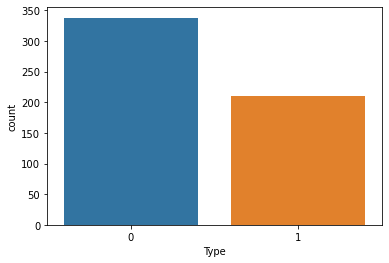

In [8]:
sbn.countplot(x="Type", data=dataFrame)

<AxesSubplot:>

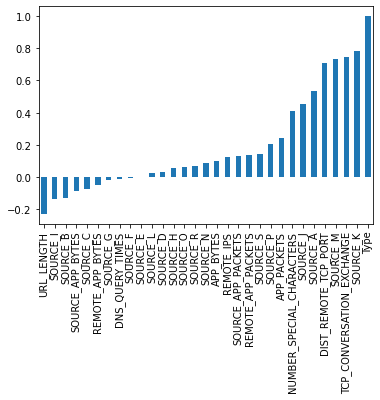

In [9]:
dataFrame.corr()["Type"].sort_values().plot(kind="bar")

In [10]:
y = dataFrame["Type"].values
x= dataFrame.drop("Type",axis = 1).values

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=15)

In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
scaler = MinMaxScaler()

In [15]:
scaler.fit(x_train)

MinMaxScaler()

In [16]:
x_train = scaler.transform(x_train)

In [17]:
x_test = scaler.transform(x_test)

In [18]:
x_train.shape

(383, 30)

In [19]:
model = Sequential()

model.add(Dense(units=30,activation="relu"))
model.add(Dense(units=15,activation="relu"))
model.add(Dense(units=15,activation="relu"))
model.add(Dense(units=1,activation="sigmoid"))

model.compile(loss="binary_crossentropy", optimizer = "adam")

In [20]:
model.fit(x=x_train, y=y_train, epochs=700,validation_data=(x_test,y_test),verbose=1)

Epoch 1/700
12/12 [==============================] - 11s 573ms/step - loss: 0.6767 - val_loss: 0.6827
Epoch 2/700
12/12 [==============================] - 0s 30ms/step - loss: 0.6596 - val_loss: 0.6706
Epoch 3/700
12/12 [==============================] - 0s 25ms/step - loss: 0.6352 - val_loss: 0.6542
Epoch 4/700
12/12 [==============================] - 0s 26ms/step - loss: 0.6160 - val_loss: 0.6324
Epoch 5/700
12/12 [==============================] - 0s 25ms/step - loss: 0.5893 - val_loss: 0.6102
Epoch 6/700
12/12 [==============================] - 0s 26ms/step - loss: 0.5549 - val_loss: 0.5798
Epoch 7/700
12/12 [==============================] - 0s 26ms/step - loss: 0.4966 - val_loss: 0.5476
Epoch 8/700
12/12 [==============================] - 0s 25ms/step - loss: 0.4688 - val_loss: 0.5116
Epoch 9/700
12/12 [==============================] - 0s 25ms/step - loss: 0.4110 - val_loss: 0.4788
Epoch 10/700
12/12 [==============================] - 0s 25ms/step - loss: 0.3487 - val_loss: 0.44

12/12 [==============================] - 0s 25ms/step - loss: 0.0141 - val_loss: 0.1505
Epoch 163/700
12/12 [==============================] - 0s 24ms/step - loss: 0.0077 - val_loss: 0.1501
Epoch 164/700
12/12 [==============================] - 0s 24ms/step - loss: 0.0143 - val_loss: 0.1515
Epoch 165/700
12/12 [==============================] - 0s 24ms/step - loss: 0.0138 - val_loss: 0.1513
Epoch 166/700
12/12 [==============================] - 0s 24ms/step - loss: 0.0116 - val_loss: 0.1506
Epoch 167/700
12/12 [==============================] - 0s 24ms/step - loss: 0.0102 - val_loss: 0.1448
Epoch 168/700
12/12 [==============================] - 0s 26ms/step - loss: 0.0116 - val_loss: 0.1540
Epoch 169/700
12/12 [==============================] - 0s 24ms/step - loss: 0.0112 - val_loss: 0.1506
Epoch 170/700
12/12 [==============================] - 0s 25ms/step - loss: 0.0108 - val_loss: 0.1539
Epoch 171/700
12/12 [==============================] - 0s 24ms/step - loss: 0.0119 - val_loss: 0

12/12 [==============================] - 0s 26ms/step - loss: 0.0010 - val_loss: 0.2416
Epoch 323/700
12/12 [==============================] - 0s 24ms/step - loss: 0.0012 - val_loss: 0.2107
Epoch 324/700
12/12 [==============================] - 0s 25ms/step - loss: 0.0012 - val_loss: 0.2297
Epoch 325/700
12/12 [==============================] - 0s 24ms/step - loss: 0.0010 - val_loss: 0.2253
Epoch 326/700
12/12 [==============================] - 0s 24ms/step - loss: 0.0013 - val_loss: 0.2238
Epoch 327/700
12/12 [==============================] - 0s 24ms/step - loss: 0.0013 - val_loss: 0.2240
Epoch 328/700
12/12 [==============================] - 0s 25ms/step - loss: 0.0012 - val_loss: 0.2281
Epoch 329/700
12/12 [==============================] - 0s 24ms/step - loss: 8.9415e-04 - val_loss: 0.2254
Epoch 330/700
12/12 [==============================] - 0s 25ms/step - loss: 9.4176e-04 - val_loss: 0.2317
Epoch 331/700
12/12 [==============================] - 0s 25ms/step - loss: 0.0011 - val

12/12 [==============================] - 0s 25ms/step - loss: 1.8006e-04 - val_loss: 0.3005
Epoch 478/700
12/12 [==============================] - 0s 24ms/step - loss: 1.9423e-04 - val_loss: 0.3094
Epoch 479/700
12/12 [==============================] - 0s 24ms/step - loss: 1.8247e-04 - val_loss: 0.3012
Epoch 480/700
12/12 [==============================] - 0s 24ms/step - loss: 1.9112e-04 - val_loss: 0.3130
Epoch 481/700
12/12 [==============================] - 0s 24ms/step - loss: 1.9850e-04 - val_loss: 0.3087
Epoch 482/700
12/12 [==============================] - 0s 24ms/step - loss: 1.2742e-04 - val_loss: 0.3087
Epoch 483/700
12/12 [==============================] - 0s 24ms/step - loss: 1.8067e-04 - val_loss: 0.3052
Epoch 484/700
12/12 [==============================] - 0s 24ms/step - loss: 2.4663e-04 - val_loss: 0.3120
Epoch 485/700
12/12 [==============================] - 0s 24ms/step - loss: 2.6499e-04 - val_loss: 0.3098
Epoch 486/700
12/12 [==============================] - 0s 24

12/12 [==============================] - 0s 24ms/step - loss: 4.3094e-05 - val_loss: 0.3628
Epoch 632/700
12/12 [==============================] - 0s 24ms/step - loss: 8.1425e-05 - val_loss: 0.3685
Epoch 633/700
12/12 [==============================] - 0s 24ms/step - loss: 6.1063e-05 - val_loss: 0.3595
Epoch 634/700
12/12 [==============================] - 0s 24ms/step - loss: 7.9799e-05 - val_loss: 0.3597
Epoch 635/700
12/12 [==============================] - 0s 24ms/step - loss: 5.2554e-05 - val_loss: 0.3639
Epoch 636/700
12/12 [==============================] - 0s 24ms/step - loss: 4.3334e-05 - val_loss: 0.3527
Epoch 637/700
12/12 [==============================] - 0s 24ms/step - loss: 5.6206e-05 - val_loss: 0.3762
Epoch 638/700
12/12 [==============================] - 0s 24ms/step - loss: 6.5897e-05 - val_loss: 0.3663
Epoch 639/700
12/12 [==============================] - 0s 24ms/step - loss: 9.7737e-05 - val_loss: 0.3624
Epoch 640/700
12/12 [==============================] - 0s 24

In [21]:
model.history.history

{'loss': [0.6741544008255005,
  0.6537265777587891,
  0.634129524230957,
  0.6091383099555969,
  0.5780984163284302,
  0.5413769483566284,
  0.49908992648124695,
  0.454218327999115,
  0.41015636920928955,
  0.36756303906440735,
  0.32719454169273376,
  0.29641276597976685,
  0.2704603970050812,
  0.24810707569122314,
  0.229906365275383,
  0.21364521980285645,
  0.2010691612958908,
  0.18692345917224884,
  0.1774560660123825,
  0.16883671283721924,
  0.16048909723758698,
  0.15455161035060883,
  0.14797061681747437,
  0.14106369018554688,
  0.13753433525562286,
  0.13185223937034607,
  0.12678714096546173,
  0.12517398595809937,
  0.128855898976326,
  0.126384899020195,
  0.11616140604019165,
  0.11123063415288925,
  0.11035320907831192,
  0.11257443577051163,
  0.10691162943840027,
  0.10339633375406265,
  0.09910541772842407,
  0.09752488881349564,
  0.09610503166913986,
  0.09417716413736343,
  0.09225538372993469,
  0.0918714627623558,
  0.09323693811893463,
  0.08829054981470108,

In [22]:
modelKaybi = pd.DataFrame(model.history.history)

<AxesSubplot:>

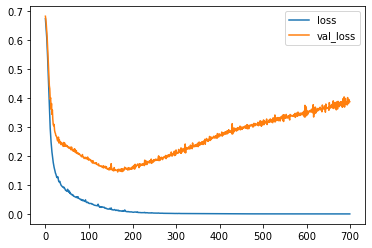

In [23]:
modelKaybi.plot()

In [24]:
model = Sequential()

model.add(Dense(units=30,activation="relu"))
model.add(Dense(units=15,activation="relu"))
model.add(Dense(units=15,activation="relu"))
model.add(Dense(units=1,activation="sigmoid"))

model.compile(loss="binary_crossentropy", optimizer = "adam")

In [26]:
earlyStopping = EarlyStopping(monitor = "val_loss",mode="min",verbose=1,patience=25)

In [29]:
model.fit(x=x_train, y=y_train, epochs=700,validation_data=(x_test,y_test), verbose=1, callbacks = [earlyStopping])

Epoch 1/700
12/12 [==============================] - 6s 130ms/step - loss: 0.6929 - val_loss: 0.6757
Epoch 2/700
12/12 [==============================] - 0s 31ms/step - loss: 0.6789 - val_loss: 0.6653
Epoch 3/700
12/12 [==============================] - 0s 30ms/step - loss: 0.6655 - val_loss: 0.6512
Epoch 4/700
12/12 [==============================] - 0s 27ms/step - loss: 0.6325 - val_loss: 0.6343
Epoch 5/700
12/12 [==============================] - 0s 28ms/step - loss: 0.6029 - val_loss: 0.6022
Epoch 6/700
12/12 [==============================] - 0s 27ms/step - loss: 0.5589 - val_loss: 0.5624
Epoch 7/700
12/12 [==============================] - 0s 28ms/step - loss: 0.5076 - val_loss: 0.5177
Epoch 8/700
12/12 [==============================] - 0s 29ms/step - loss: 0.4585 - val_loss: 0.4660
Epoch 9/700
12/12 [==============================] - 0s 28ms/step - loss: 0.4097 - val_loss: 0.4372
Epoch 10/700
12/12 [==============================] - 0s 29ms/step - loss: 0.3553 - val_loss: 0.374

In [30]:
modelKaybi = pd.DataFrame(model.history.history)

<AxesSubplot:>

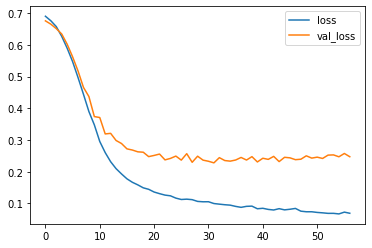

In [32]:
modelKaybi.plot()

In [33]:
model = Sequential()

model.add(Dense(units=30,activation="relu"))
model.add(Dropout(0.6))

model.add(Dense(units=15,activation="relu"))
model.add(Dropout(0.6))

model.add(Dense(units=15,activation="relu"))
model.add(Dropout(0.6))

model.add(Dense(units=1,activation="sigmoid"))

model.compile(loss="binary_crossentropy", optimizer = "adam")

In [34]:
model.fit(x=x_train, y=y_train, epochs=700,validation_data=(x_test,y_test), verbose=1, callbacks = [earlyStopping])

Epoch 1/700
12/12 [==============================] - 7s 134ms/step - loss: 0.7733 - val_loss: 0.7030
Epoch 2/700
12/12 [==============================] - 0s 32ms/step - loss: 0.7264 - val_loss: 0.6995
Epoch 3/700
12/12 [==============================] - 0s 33ms/step - loss: 0.7144 - val_loss: 0.6960
Epoch 4/700
12/12 [==============================] - 0s 30ms/step - loss: 0.7102 - val_loss: 0.6927
Epoch 5/700
12/12 [==============================] - 0s 32ms/step - loss: 0.6948 - val_loss: 0.6896
Epoch 6/700
12/12 [==============================] - 0s 33ms/step - loss: 0.6947 - val_loss: 0.6859
Epoch 7/700
12/12 [==============================] - 0s 30ms/step - loss: 0.6791 - val_loss: 0.6834
Epoch 8/700
12/12 [==============================] - 0s 30ms/step - loss: 0.7069 - val_loss: 0.6815
Epoch 9/700
12/12 [==============================] - 0s 30ms/step - loss: 0.6890 - val_loss: 0.6811
Epoch 10/700
12/12 [==============================] - 0s 31ms/step - loss: 0.6785 - val_loss: 0.679

In [35]:
kayipDf = pd.DataFrame(model.history.history)

<AxesSubplot:>

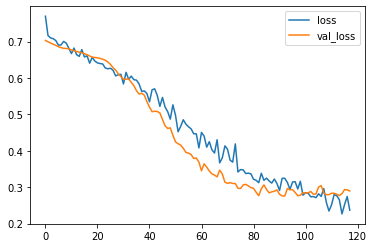

In [36]:
kayipDf.plot()

In [37]:
tahminlerimiz = model.predict_classes(x_test)

C:\Users\ADMINNET\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [38]:
tahminlerimiz

array([[0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
    

In [39]:
from sklearn.metrics import classification_report, confusion_matrix

In [40]:
print(classification_report(y_test,tahminlerimiz))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90        91
           1       0.90      0.84      0.87        74

    accuracy                           0.88       165
   macro avg       0.89      0.88      0.88       165
weighted avg       0.89      0.88      0.88       165



In [41]:
print(confusion_matrix(y_test,tahminlerimiz))

[[84  7]
 [12 62]]
